# The Atoms of Computation

  
Programming a quantum computer is now something that anyone can do in the comfort of their own home.

But what to create? What is a quantum program anyway? In fact, what is a quantum computer?


These questions can be answered by making comparisons to standard digital computers. Unfortunately, most people don’t actually understand how digital computers work either. In this article, we’ll look at the basics principles behind these devices. To help us transition over to quantum computing later on, we’ll do it using the same tools as we'll use for quantum.

## Contents

1. [Splitting information into bits](#bits)    
2. [Computation as a Diagram](#diagram)    
3. [Your First Quantum Circuit](#first-circuit)    
4. [Example: Adder Circuit](#adder)       
  4.1 [Encoding an Input](#encoding)    
  4.2 [Remembering how to Add](#remembering-add)    
  4.3 [Adding with Qiskit](#adding-qiskit)     

Below is some Python code we'll need to run if we want to use the code in this page:

In [ ]:
from qiskit import QuantumCircuit, assemble # originally ,Aer
from qiskit_aer import Aer # But it's been changed
from qiskit.visualization import plot_histogram

## 1. Splitting information into bits <a id="bits"></a>

The first thing we need to know about is the idea of bits. These are designed to be the world’s simplest alphabet. With only two characters, 0 and 1, we can represent any piece of information.

One example is numbers. You are probably used to representing a number through a string of the ten digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. In this string of digits, each digit represents how many times the number contains a certain power of ten. For example, when we write 9213, we mean



$$ 9000 + 200 + 10 + 3 $$



or, expressed in a way that emphasizes the powers of ten



$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$



Though we usually use this system based on the number 10, we can just as easily use one based on any other number. The binary number system, for example, is based on the number two. This means using the two characters 0 and 1 to express numbers as multiples of powers of two. For example, 9213 becomes 10001111111101, since



$$ 9213  = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11})+ (0 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$



In this we are expressing numbers as multiples of 2, 4, 8, 16, 32, etc. instead of 10, 100, 1000, etc.
<a id="binary_widget"></a>

In [6]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

These strings of bits, known as binary strings, can be used to represent more than just numbers. For example, there is a way to represent any text using bits. For any letter, number, or punctuation mark you want to use, you can find a corresponding string of at most eight bits using [this table](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm). Though these are quite arbitrary, this is a widely agreed-upon standard. In fact, it's what was used to transmit this article to you through the internet.

This is how all information is represented in computers. Whether numbers, letters, images, or sound, it all exists in the form of binary strings.

Like our standard digital computers, quantum computers are based on this same basic idea. The main difference is that they use *qubits*, an extension of the bit to quantum mechanics. In the rest of this textbook, we will explore what qubits are, what they can do, and how they do it. In this section, however, we are not talking about quantum at all. So, we just use qubits as if they were bits.

### Quick Exercises
1. Think of a number and try to write it down in binary.
2. If you have $n$ bits, how many different states can they be in?

## 2. Computation as a diagram <a id="diagram"></a>

Whether we are using qubits or bits, we need to manipulate them in order to turn the inputs we have into the outputs we need. For the simplest programs with very few bits, it is useful to represent this process in a diagram known as a *circuit diagram*. These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between. These operations are called 'gates', mostly for historical reasons.

Here's an example of what a circuit looks like for standard, bit-based computers. You aren't expected to understand what it does. It should simply give you an idea of what these circuits look like.

![image1](https://raw.githubusercontent.com/NCCR-SPIN/qiskit-textbook/892f5dc28b27ee43a3f26f2a7d9f7d376de4e6d8/content/ch-states/images/classical_circuit.png)

For quantum computers, we use the same basic idea but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the quantum circuit that represents the same process as above.

![image2](https://raw.githubusercontent.com/NCCR-SPIN/qiskit-textbook/892f5dc28b27ee43a3f26f2a7d9f7d376de4e6d8/content/ch-states/images/quantum_circuit.png)

In the rest of this section, we will explain how to build circuits. At the end, you'll know how to create the circuit above, what it does, and why it is useful.

## 3. Your first quantum circuit <a id="first-circuit"></a>

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs.

In [7]:
qc_output = QuantumCircuit(8)

This circuit, which we have called `qc_output`, is created by Qiskit using `QuantumCircuit`. The `QuantumCircuit` takes the number of qubits in the quantum circuit as an argument. 

The extraction of outputs in a quantum circuit is done using an operation called `measure_all()`. Each measurement tells a specific qubit to give an output to a specific output bit. The command `qc_output.measure_all()` adds a measurement to each qubit in the circuit `qc_output`, and also adds some classical bits to write the output to.

In [8]:
qc_output.measure_all()

Now that our circuit has something in it, let's take a look at it.

In [9]:
qc_output.draw(initial_state=True) 

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

Qubits are always initialized to give the output ```0```. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always ```00000000```: a ```0``` from each qubit.

Matplotlib is building the font cache; this may take a moment.


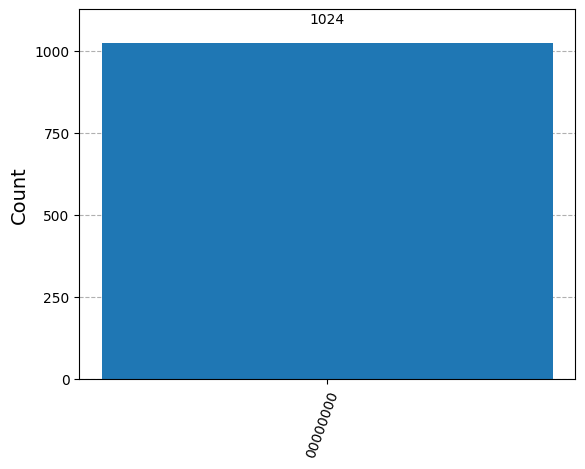

In [10]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results. In this case, since we aren’t doing anything quantum, we get just the ```00000000``` result with certainty.

Note that this result comes from a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Simulations are only possible for small numbers of qubits (~30 qubits), but they are nevertheless a very useful tool when designing your first quantum circuits. To run on a real device you simply need to replace ```Aer.get_backend('aer_simulator')``` with the backend object of the device you want to use. 

## 4. Example: Creating an Adder Circuit <a id="adder"></a>
### 4.1 Encoding an input <a id="encoding"></a>

Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: ```0``` becomes ```1``` and ```1``` becomes ```0```. For qubits, it is an operation called ```x``` that does the job of the NOT.

Below we create a new circuit dedicated to the job of encoding and call it `qc_encode`. For now, we only specify the number of qubits.

In [11]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

Extracting results can be done using the circuit we have from before: `qc_output`.

In [12]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

Now we can run the combined circuit and look at the results.

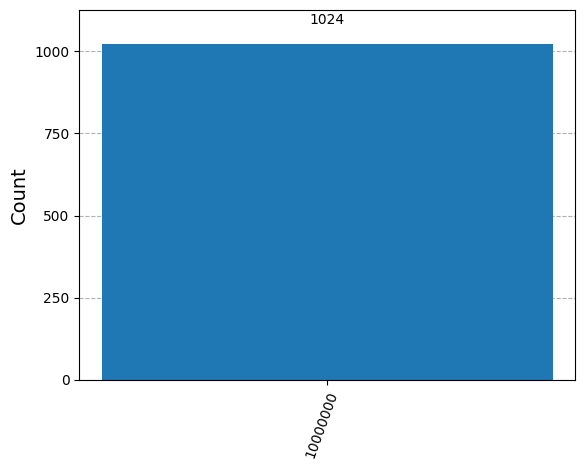

In [13]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Now our computer outputs the string ```10000000``` instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. Specifically, it means that qubit 7 is telling us about how many $2^7$s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

Now try out writing another number for yourself. You could do your age, for example. Just use a search engine to find out what the number looks like in binary (if it includes a ‘0b’, just ignore it), and then add some 0s to the left side if you are younger than 128.

In [18]:
# my age: 27 -> (0b) 11011
qc_encode = QuantumCircuit(5)
qc_encode.x(0)
qc_encode.x(1)
qc_encode.x(3)
qc_encode.x(4)

qc_encode.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘

In [19]:
qc_encode.measure_all()
qc_encode.draw()

┌───┐ ░ ┌─┐            
   q_0: ┤ X ├─░─┤M├────────────
        ├───┤ ░ └╥┘┌─┐         
   q_1: ┤ X ├─░──╫─┤M├─────────
        └───┘ ░  ║ └╥┘┌─┐      
   q_2: ──────░──╫──╫─┤M├──────
        ┌───┐ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ X ├─░──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ X ├─░──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════╩══╩══╩══╩══╩═
                 0  1  2  3  4

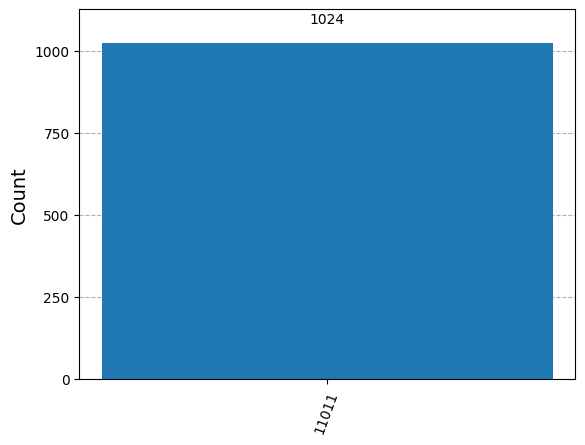

In [20]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Now we know how to encode information in a computer. The next step is to process it: To take an input that we have encoded, and turn it into an output that we need.

### 4.2 Remembering how to add <a id="remembering-add"></a>

To look at turning inputs into outputs, we need a problem to solve. Let’s do some basic maths. In primary school, you will have learned how to take large mathematical problems and break them down into manageable pieces. For example, how would you go about solving the following?

```
   9213
+  1854
=  ????
```

One way is to do it digit by digit, from right to left. So we start with 3+4
```
   9213
+  1854
=  ???7
```

And then 1+5
```
   9213
+  1854
=  ??67
```

Then we have 2+8=10. Since this is a two digit answer, we need to carry the one over to the next column.

```
   9213
+  1854
=  ?067
   ¹ 
```

Finally we have 9+1+1=11, and get our answer

```
   9213
+  1854
= 11067
   ¹ 
```

This may just be simple addition, but it demonstrates the principles behind all algorithms. Whether the algorithm is designed to solve mathematical problems or process text or images, we always break big tasks down into small and simple steps.

To run on a computer, algorithms need to be compiled down to the smallest and simplest steps possible. To see what these look like, let’s do the above addition problem again but in binary.


```
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

Note that the second number has a bunch of extra 0s on the left. This just serves to make the two strings the same length.

Our first task is to do the 1+0 for the column on the right. In binary, as in any number system, the answer is 1. We get the same result for the 0+1 of the second column.

```
   10001111111101
+  00011100111110

=  ????????????11 
```

Next, we have 1+1. As you’ll surely be aware, 1+1=2. In binary, the number 2 is written ```10```, and so requires two bits. This means that we need to carry the 1, just as we would for the number 10 in decimal.

```
   10001111111101
+  00011100111110
=  ???????????011 
             ¹ 
```

The next column now requires us to calculate ```1+1+1```. This means adding three numbers together, so things are getting complicated for our computer. But we can still compile it down to simpler operations, and do it in a way that only ever requires us to add two bits together. For this, we can start with just the first two 1s.

```
   1
+  1
= 10
```

Now we need to add this ```10``` to the final ```1``` , which can be done using our usual method of going through the columns.

```
  10
+ 01
= 11
```

The final answer is ```11``` (also known as 3).

Now we can get back to the rest of the problem. With the answer of  ```11```, we have another carry bit.

```
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

So now we have another 1+1+1 to do. But we already know how to do that, so it’s not a big deal.

In fact, everything left so far is something we already know how to do. This is because, if you break everything down into adding just two bits, there are only four possible things you’ll ever need to calculate. Here are the four basic sums (we’ll write all the answers with two bits to be consistent).

```
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

This is called a *half adder*. If our computer can implement this, and if it can chain many of them together, it can add anything.

### 4.3 Adding with Qiskit <a id="adding-qiskit"></a>

Let's make our own half adder using Qiskit. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

![half adder implemented on a quantum circuit](images/half-adder.svg)


The two bits we want to add are encoded in the qubits 0 and 1. The above example encodes a ```1``` in both these qubits, and so it seeks to find the solution of ```1+1```. The result will be a string of two bits, which we will read out from the qubits 2 and 3 and store in classical bits 0 and 1, respectively. All that remains is to fill in the actual program, which lives in the blank space in the middle.

The dashed lines in the image are just to distinguish the different parts of the circuit (although they can have more interesting uses too). They are made by using the `barrier` command.

The basic operations of computing are known as logic gates. We’ve already used the NOT gate, but this is not enough to make our half adder. We could only use it to manually write out the answers. Since we want the computer to do the actual computing for us, we’ll need some more powerful gates.

To see what we need, let’s take another look at what our half adder needs to do.

```
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

The rightmost bit in all four of these answers is completely determined by whether the two bits we are adding are the same or different. So for ```0+0``` and ```1+1```, where the two bits are equal, the rightmost bit of the answer comes out ```0```. For ```0+1``` and ```1+0```, where we are adding different bit values, the rightmost bit is ```1```.

To get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, in the study of digital computation, this is called an XOR gate.

| Input 1 | Input 2 | XOR Output |
|:-------:|:-------:|:------:|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

In quantum computers, the job of the XOR gate is done by the controlled-NOT gate. Since that's quite a long name, we usually just call it the CNOT. In Qiskit its name is ```cx```, which is even shorter. In circuit diagrams, it is drawn as in the image below.

In [21]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

This is applied to a pair of qubits. One acts as the control qubit (this is the one with the little dot). The other acts as the *target qubit* (with the big circle that has a ```+``` inside it).

There are multiple ways to explain the effect of the CNOT. One is to say that it looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes ```0``` if they are the same, and ```1``` if they are different.

<img src="images/cnot_xor.svg">

Another way of explaining the CNOT is to say that **it does a NOT on the target if the control is ```1```**, and does nothing otherwise. This explanation is just as valid as the previous one (in fact, it’s the one that gives the gate its name).

Try the CNOT out for yourself by trying each of the possible inputs. For example, here's a circuit that tests the CNOT with the input ```01```.

In [34]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

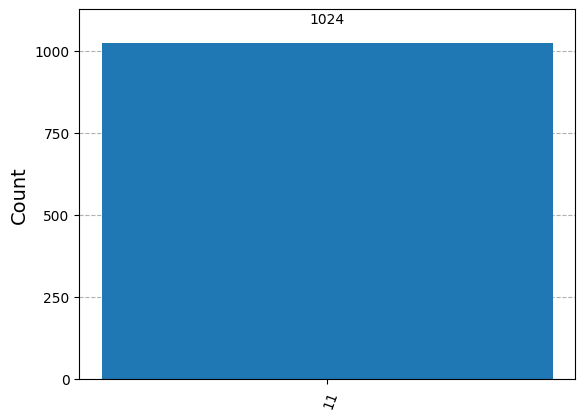

In [36]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

If you execute this circuit, you’ll find that the output is ```11```. We can think of this happening because of either of the following reasons.

- The CNOT calculates whether the input values are different and finds that they are, which means that it wants to output ```1```. It does this by writing over the state of qubit 1 (which, remember, is on the left of the bit string), turning ```01``` into ```11```.

- The CNOT sees that qubit 0 is in state ```1```, and so applies a NOT to qubit 1. This flips the ```0``` of qubit 1 into a ```1```, and so turns ```01``` into ```11```.

Here is a table showing all the possible inputs and corresponding outputs of the CNOT gate:

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            | 00             |
| 01            | 11             |
| 10            | 10             |
| 11            | 01             |

For our half adder, we don’t want to overwrite one of our inputs. Instead, we want to write the result on a different pair of qubits. For this, we can use two CNOTs.

In [37]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

We are now halfway to a fully working half adder. We just have the other bit of the output left to do: the one that will live on qubit 3.

If you look again at the four possible sums, you’ll notice that there is only one case for which this is ```1``` instead of ```0```: ```1+1```=```10```. It happens only when both the bits we are adding are ```1```.

To calculate this part of the output, we could just get our computer to look at whether both of the inputs are ```1```. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of ```1``` for this case only, giving us the output we need.

For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state ```1```. This new gate is called the *Toffoli*. For those of you who are familiar with Boolean logic gates, it is basically an AND gate.

In Qiskit, the Toffoli is represented with the `ccx` command.

In [29]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

In this example, we are calculating ```1+1```, because the two input bits are both ```1```. Let's see what we get.

/var/folders/jt/h49fknsd1lj0h5crm2h74_p80000gn/T/ipykernel_9726/4238998970.py:1: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(qc_ha)
/var/folders/jt/h49fknsd1lj0h5crm2h74_p80000gn/T/ipykernel_9726/4238998970.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = sim.run(qobj).result().get_counts()


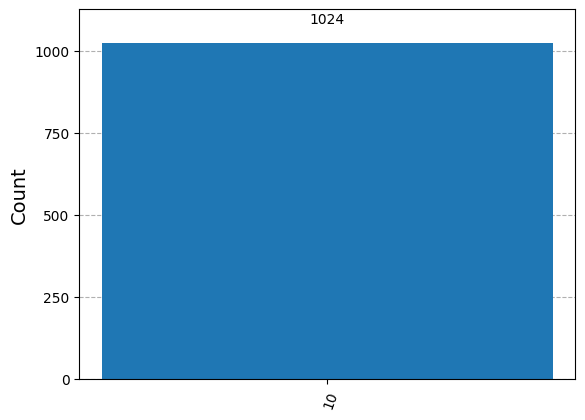

In [30]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

The result is ```10```, which is the binary representation of the number 2. We have built a computer that can solve the famous mathematical problem of 1+1!

Now you can try it out with the other three possible inputs, and show that our algorithm gives the right results for those too.

The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value ```1```. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.

As we'll see, in quantum computing we split the atom.